In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
60000


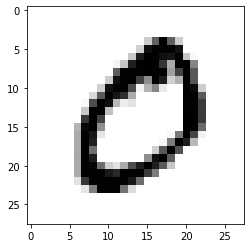

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


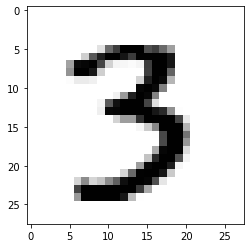

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [12]:
print(x_train.shape) #채널 수의 정보 없음 
#--> (60000, 28, 28, 1) 로 만들어야 함

(60000, 28, 28)


In [13]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1973 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0646 - accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0478 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0379 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# evaluate는 X와 y를 둘 다 paramter로 넣어서 loss와 metrics 계산을 둘다 해주는데
# predict는 X만 넣어서 예측값만 반환해주는 것입니다.

313/313 - 1s - loss: 0.0402 - accuracy: 0.9889
test_loss: 0.04016023129224777 
test_accuracy: 0.9889000058174133


In [16]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [8.1981533e-10 2.2421761e-12 4.2755294e-10 1.1541509e-07 5.5791368e-11
 6.2710866e-13 8.0215873e-18 9.9999976e-01 3.1216488e-10 8.1614509e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


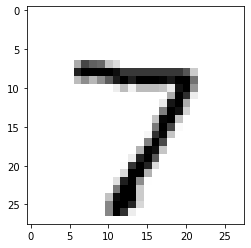

In [17]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.0755416e-10 5.3039920e-03 1.1717239e-06 9.9452609e-01 2.0658857e-05
 1.4113997e-04 5.0111549e-07 7.4931270e-09 6.4657143e-06 3.1340108e-11]
라벨: 1, 예측결과: 3


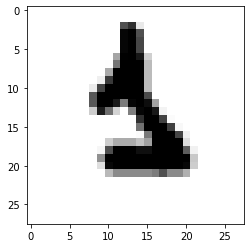

예측확률분포: [2.2795386e-10 5.6109327e-13 1.4937919e-14 9.9934381e-01 6.2592596e-12
 6.5622706e-04 7.3853458e-12 3.9663661e-13 4.7319770e-09 2.7078983e-09]
라벨: 5, 예측결과: 3


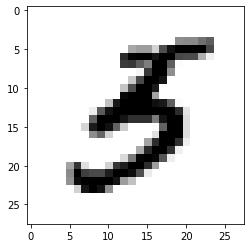

예측확률분포: [3.3670788e-09 4.1272242e-06 1.1268751e-06 1.0559120e-08 9.8504663e-01
 3.2352270e-07 2.3691975e-06 8.1572034e-06 1.0225340e-02 4.7119213e-03]
라벨: 9, 예측결과: 4


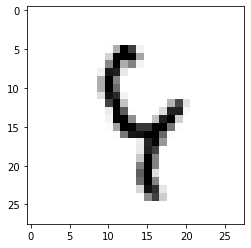

예측확률분포: [1.04244464e-07 2.62218269e-09 1.99469080e-10 1.64788773e-07
 2.66197435e-06 3.28669984e-07 8.47698267e-09 3.51460898e-07
 7.90309191e-01 2.09687263e-01]
라벨: 9, 예측결과: 8


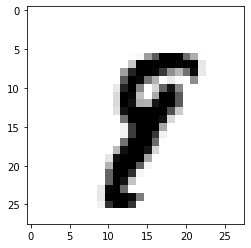

예측확률분포: [5.85493854e-06 2.11053660e-07 2.62299359e-01 1.07083804e-04
 1.49677426e-09 1.12621077e-15 1.37702866e-14 7.37584710e-01
 2.76746346e-06 5.59099167e-09]
라벨: 2, 예측결과: 7


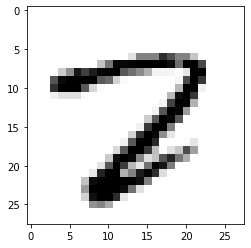

In [18]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels): 
    # for i in range(len(predicted_labels): 
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [19]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 하이퍼 파라미터를 바꾸어가면서 시험용 데이터에 대한 인식률 확인

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               